# TP d'appropriation de l'apprentissage artificiel et du "Deep Learning" avec Numpy, SKLearn et Keras
### MASTER SIIA 


#Introduction

**TensorFlow** est un outil qui permet d'implémenter et de tester rapidement des algorithmes d'apprentissage artificiel profonds. Une de ses caractéristiques est d'être adapté à des architectures matérielles dédiées au calcul (GPU) et de permettre une distribution de ce calcul sur des grappes de machines très simplement. Il permet d'utiliser de nombreux algorithmes prets à l'usage mais également de définir soi même tous les composants d'une architecture profonde de façon très détaillée. Il est également doté d'un outil de visualisation de l'architecture en cours de construction grâce à **tensor board.**

Sa prise en main nécessite de connaitre les principaux algorithmes et principes d'apprentissage ainsi que la manipulation de données avec **Numpy**. Durant ce TP nous allons commencer par une présentation rapide de quelques fonctions de **Numpy** qui est une librairie python dédiée au calcul numérique. Nous aborderons également **matplotlib** qui vous permettra de tracer des courbes facilement. Nous verrons leur usage à travers l'utilisation de quelques fonctions de **Scikit-learn** également dédiée à l'apprentissage artificiel. **Scikit-Learn (Ou SKlearn)** avait été regroupé avec **Tensor Flow 1** pour donner naissance a **skFlow**. Néanmoins, cette librairie fut progressivement remplacer par **Keras** conjointement avec l'arrivée de **Tensor Flow 2**. Tout ceci a pour but de vous expliquer pourquoi, il y a parfois des confusion entre les versions, les codes, les noms des librairies. **Keras** a l'ambition d'être uns sur-couche à plusieurs librairies dont **Tensor flow**. Cependant pour entrer dans le détail des modèles, il est nécessaire de descendre un cran en dessous (chose que nous n'aurons sans doute pas le temps de faire). 

### Evolution 2020 :
La crise sanitaire m'a incité à passer ce TP sous notebook google collab mais il est toujours possible d'exécuter le code en local sur vos machines. La principale difficulté étant celle de l'installation des bonnes versions des libraires. Il existe donc deux versions du TP, la version présente contient du code *Tensor Flow 2* exécutable sous Google Collab. Vous trouverez sur ma page web une version compatible avec **Tensor flow 1 et skLearn**.

# Numpy

**Numpy** permet une manipulation rapide de structures de données telles que les matrices (classe `array`). Il implémente également de façon rigoureuse des opérations sur les données grâce à la classe `linalg`. Le code suivant montre comment générer des données de test. Ici une entrée est une valeur choisie aléatoirement (et rangée dans le tableau X) et une sortie est calculée comme une fonction linéaire de l'entrée auquel on a ajouté un bruit (rangée dans le tableau y).

In [ ]:
import numpy as np
nbDonnee = 100
X = 3*np.random.rand(nbDonnee,1) # Génération de 100 valeurs aléatoires représentant 100 exemples d'entrées.
y = 2 + 4*X + np.random.randn(nbDonnee,1) # Génération des données de sorties qui sont une fonction des entrées plus un bruit.

Vous pouvez afficher les points correspondants grâce à `matplotlib`

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot(X,y, "b.") # On trace un point bleu pour chaque point des données
plt.axis([0,3,0,15]) # On fixe les bornes de l'abscisse et de l'ordonnée du graphique
plt.show() # On affiche le tout

Rappelons qu'une régression linéaire consiste à calculer le vecteur \($\Theta\$) tel que l'estimation de \(y\) connaissant une entrée \(x\), est :

$$ \widehat y = h_{\Theta}(x) = \Theta^{T}.x $$

\($h_{\Theta}$\) étant une fonction hypothèse (linéaire), dépendant des paramètres \($\Theta$\).

Rappelons également qu'il existe une solution analytique du calcul de \($\Theta$\) minimisant la moyenne du carré des erreurs de prédiction, cette solution est :

$$ \widehat \Theta = (X^T.X)^{-1}.X^T.Y $$

Où \($X$\) est l'ensemble des données d'entrée et Y l'ensemble des données de sorties.

Numpy permet de transposer des matrices (operateur `T`) d'en faire le produit (fonction `dot()`) ou de les inverser (fonction `inv()`) de la classe `linalg`).

Rappelons également qu'une combinaison linéaire lorsque les entrées ne sont composées que d'une valeur \($x_1$\), se calcule de la façon suivante :

$$ \widehat y = \theta_0 + \theta_1 * x_1 $$.

Par conséquent, pour faire le calcul de \($\Theta$\), il faut ajouter une colonne de 1 aux entrées X pour introduire \($\Theta_0$\) dans la solution.

Ceci se fait avec l'opérateur `c_` qui permet de concaténer des colonnes. On peut ainsi calculer la régression linéaire et l'afficher :

Theta :  [[1.86803873]
 [4.10717759]]


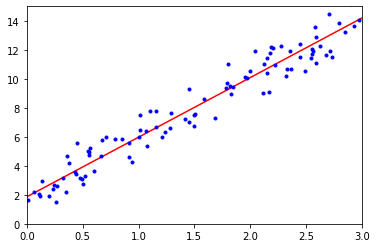

In [ ]:
import time
X_b = np.c_[np.ones((nbDonnee,1)),X] # Ajout de la constante '1' à chaque donnée pour calculer le biais theta0 (rappelons que l'équation d'une regression linéaire est y = theta0 + theta1*x1 + theta2*x2 + ... Ici on a juste une valeur par exemple (donc x1) et on ajoute le 1 pour calculer le theta0 
before = time.time() #permettra d'obtenir le temps de calcul de l'algorithme
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #  Numpy est doté de nombreux algorithmes d'algèbre linéaire. Ici, il permet de calculer l'inverse d'une matrice. (rappelons qu'il existe une solution analytique permettant de calculer le theta qui minimise la MSE et qui est [1/(Xt.X)].Xt.y
print("Theta : ", theta_best)
# Nous allons maintenant tracer la droite représentant le theta_best ainsi que les points utilisés pour l'apprendre
X_new= np.array([[0],[3]]) # Choix de 2 valeurs de X
X_new_b = np.c_[np.ones((2,1)),X_new] # On ajoute le '1' à chaque donnée
y_predict = X_new_b.dot(theta_best) # on calcul le y à partir de theta_best
plt.plot(X_new, y_predict, "r-") # On trace une droite rouge entre les 2 points prédits
plt.plot(X,y, "b.") #On trace un point bleu pour chaque point des données utilisées pour apprendre theta
plt.axis([0,3,0,15]) # On fixe les bornes de l'abscisse et de l'ordonnée du graphique
plt.show() # On affiche la courbe

## Question 1 :

Tester le code précédent et observer les courbes correspondantes. Générez des données ne se rapprochant pas d'une droite (par exemple à l'aide d'une fonction sinusoïdale, une puissance ou toute autre fonction non linéaire) et faites une regression linéaire. Affichez le résultat. Quelle conclusion ?

## Question 2 :

Ajoutez une colonne aux entrées qui représentent les valeurs de ces entrées mises au carré. Faite une régression linéaire sur cette représentation des entrées par 2 valeurs.

Une exemple de code permettant de construire un tableau `X2` du carré des éléments d'un tableau `X` à l'aide d'une lambda fonction est:

In [ ]:
X2 = np.apply_along_axis(lambda x: (x*x), 0, X)

Attention, il n'est plus possible de tracer une droite pour représenter les sorties calculées par le modèle puisqu'elles ne suivent plus l'équation d'une droite.

Quelle Conclusion ?

# Scikit-Learn

`Scikit-Learn` permet d'utiliser des algorithmes d'apprentissage artificiel 'tout prêts' et apporte également des fonctions supplémentaires bien utiles. Nous allons d'ailleurs commencer par une généralisation de ce qui a été fait précédemment grâce à lui. On parle de **polynomialisation**. Il s'agit d'ajouter aux *features* leur valeur au carré, à la puissance 3, à la puissance n, ainsi que la valeur de leurs produits respectifs (par exemple x1 * x2) et de leur produit au carré, à la puissance n ... Ceci devrait améliorer la précision du prédicteur (au risque de lui faire faire du sur-apprentissage).

Dans `Scikit-learn`, il existe un moyen rapide de polynomiser un vecteur de features : la classe `PolynomialFeatures` :



In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
# on va pousser jusque la puissance 3 et on ajoute la colonne de 1 pour le Theta0
poly_features = PolynomialFeatures(degree=3, include_bias=True) 
X = 3*np.random.rand(3,1) # Generation de trois valeurs pouvant représenter 3 exemples d'entrées
X_poly=poly_features.fit_transform(X) # Cette fonction fait la polynomialisation pour nous ;-)
print ("X : " , X)
print ("X_poly : ", X_poly)

X :  [[2.27915404]
 [1.36342446]
 [0.46160826]]
X_poly :  [[ 1.          2.27915404  5.19454312 11.83916392]
 [ 1.          1.36342446  1.85892627  2.53450555]
 [ 1.          0.46160826  0.21308219  0.0983605 ]]


## Question 3:

*   Testez une fonction à apprendre assez complexe avec différents degrès de polynomialisation.
*   Découpez ce jeu en 2/3 dédié à l'apprentissage et 1/3 dédié à la vérification (jeu de test). On découpe un tableau en deux de cette façon:

In [ ]:
a = [1,2,3,4,5]
b = a[:2]
print(b)

import numpy as np

c = np.array([[1,2,3],[4,5,6]])
print (c[:,2])


[1, 2]
[3 6]


##Question 4

Calculez la MSE (moyenne des erreurs au carré) des données apprises et la MSE de données de test. Observez le sur-apprentissage. Avec scikit-learn, le calcul de la MSE se fait ainsi :

In [ ]:

from sklearn.metrics import mean_squared_error
y = [1, 2, -2, 3, 1.5] # y sont les valeurs des sorties réelles qu'il faudrait retrouver
yp = [0.2, 1.8, 3, 2,2] # yp sont les valeurs estimées par l'algorithme d'apprentissage
MSE = mean_squared_error(y,yp)
print(MSE)

5.386


## Notion de régularisation

Trouver la polynomialisation qui permet d'éviter le sur-apprentissage tout en garantissant un apprentissage s'appelle la "régularisation" d'un modèle. Il existe différentes façons de régulariser une regression. Parmi elles, il y a la "Ridge Regression" encore nommée la Regularisation de Tikhonov, la Regression en lasso (Least Absolute Shrinkage and Selection Operator Regression), l'Elastic Net ou le Early Stopping. Je vous invite à consulter la litterature pour avoir des détails sur ces différentes méthodes ([par exemple ici](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a)).

# Et la descente de grandient dans tout ça ?

Le calcul Analytique de la solution, qui se traduit par l'utilisation d'un calcul matriciel :
`np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)`
Pose des problèmes lorsque le nombre de données est très grand (ce qui est le cas des bases de données actuelles). C'est une des raisons pour laquelle on s'est rapidement penché vers des méthodes itératives du type *descente de gradient* qui évitent l'utilisation d'une matrice de taille NxN (pour N données).
L'autre interêt de la *descente de gradient* est qu'elle peut se faire paramétrer des modèles non linéaires (réseaux de neurones par exemple).


# Utiliser des bases de données

Nous allons donc passer à des quantités de données plus importantes présentant également un nombre de *features* plus important et surtout, représentant des informations *réelles* extraites d'observations. Il existe de très nombreuses bases de données disponibles (par exemple le [data set du CMU](http://lib.stat.cmu.edu/datasets/), voir la [liste Wikipedia à ce sujet](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)). `Scikit-Learn` possède un package `datasets` qui permet d'accéder à différents exemples de données. Il existe une fonction `load` pour chaque base : `load_boston()`, `load_iris()`, `load_diabetes()`, `load_digits()` ... `Scikit-learn` fournit également des images (`load_sample_image()`) et des générateurs de données permettant de fabriquer des valeurs controlées et des bases de toute taille. Nous allons utiliser une base très classique `iris` qui contient des fleurs réparties selon trois classes. Le fait d'appartenir à une classe dépendant de différentes propriétés de la fleur ([voir ici les détails sur iris](https://archive.ics.uci.edu/ml/datasets/iris)). Le code ci-dessous vous permet de visualiser la classe de chaque fleur en fonction de ces propriétés (longueur des pétales, longueur des sépales, largeurs des sépales, largeurs des pétales).


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

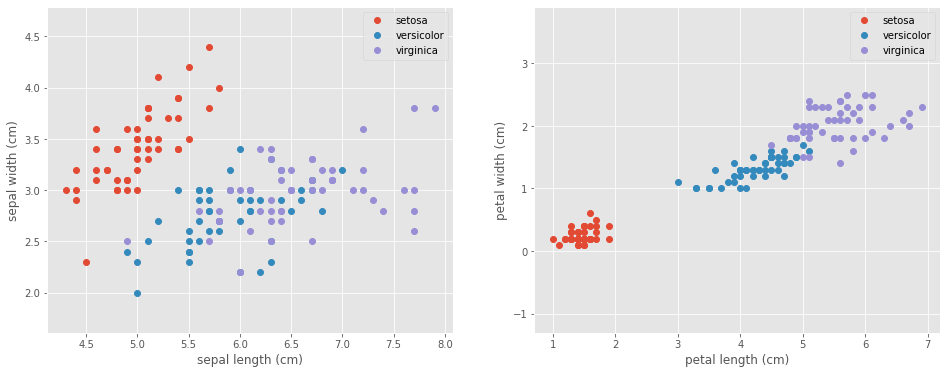

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
#print(X)
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

#Première Régression Logistique

Nous allons maintenant entrer dans le vif du sujet en essayant de faire une régression logistique sur cette base de donnée 'iris`. La regression logistique (appelée parfois Logit Regression) permet de classer des données ou plutôt de fournir une probabilité d'appartenance d'une donnée à une classe (si la probabilité est supérieure à 0.5 on l'affecte à une classe et si elle est inférieure à 0.5, on ne l'affecte pas à cette classe).

Cette probabilité est $$\widehat p = h_\Theta(x) = \sigma(\Theta^T . x) $$ où $\Theta$ est le vecteur des poids à calculer et sigma est la fonction logistique : $$\sigma(t)= {1 \over (1 + exp(-t))}$$

De façon plus explicite, on calcul une fonction linéaire $\theta_1*x_1 + \theta_2*x_2 + ...\theta_n*x_n$ que l'on fait passer dans une fonction sigmoïde $\sigma()$ (qui permet de renvoyer une valeur comprise entre 0 et 1) qui est alors la probabilité d'appartenance de la donnée d'entrée à la classe concernée.

Il n'y a pas de solution analytique à la recherche du vecteur des poids $\Theta$ et comme expliqué ci-dessous, si il y en avait une, le nombre de données la rendrait sans doute inapplicable du point de vu de la mémoire utilisée. Par contre, la fonction de cout ([log loss](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)), qui est la moyenne des couts sur un ensemble de données d'apprentissage, est convexe (Il n'y a pas de minimums locaux) et donc on peut calculer les poids avec une simple descente de gradient et être sûr que l'on obtient un apprentissage optimal. Pour cela, `Scikit-learn` fournit une classe `LogisticRegression` qui possède une méthode `fit()` calculant les poids $\Theta $ par descente de gradient. Ceci permettant donc de fournir une probabilité d'appartenance à une classe (en prenant les `features` d'un exemple en entrée). Le code ci-dessous illustre ce processus.
Sur la figure finale sont représentées :
* en bleu, l'appartenance ou non à la classe *iris virginica* de chaque exemple en fonction de la largeur des pétales.
* en vert la sortie de la fonction sigmoïde ($\sigma()$, donc la probabilité d'appartenir à la classe *iris virginica*) en fonction d'une valeur de largeur de pétales.
* en rouge, le complément : la probabilité de ne pas appartenir à cette classe.

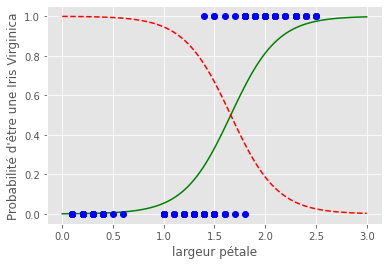

Accuracy: 0.960000


In [ ]:
from sklearn import datasets,  metrics
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
#print(list(iris.keys()))
# ['target_names', 'data', 'DESCR', 'target', 'feature_names']
# Chaque fleur possède 4 features (de 0 à 3), la 3 étant la largeur les pétales
Largeur = iris["data"][:, 3:]
# La "target" étant un type de fleur compris entre 0 et 2
Type = (iris["target"] == 2).astype(np.int) # On créé une liste qui contient 1 lorsque la fleur est de type 2 et 0 sinon pour faire une classification
log_reg = LogisticRegression() # On créé un modèle de régression logistique (qui définit ce qu'est la fonction cout et qui sait calculer la régression)
log_reg.fit(Largeur,Type)
# On va créer une représentation de ce que rend le modèle (Type en fonction de largeur)
Largeur_new = np.linspace(0,3,100).reshape(-1,1) # linspace renvoie 100 valeurs permettant d'aller de 0 à 3, reshape() les repositionne dans un tableau à 1 colonne pour pouvoir les envoyer à "predict_proba"
#print("Largeur_new")
#print(Largeur_new)
Type_proba = log_reg.predict_proba(Largeur_new) # predict proba renvoie un tableau de 2 colonnes : proba classe False / proba classe True
#print("Typeproba")
#print(Type_proba)
plt.plot(Largeur_new, Type_proba[:,1], "g-", label = "Iris-Virginica") #en vert ligne continue
plt.xlabel("largeur pétale")
plt.ylabel("Probabilité d'être une Iris Virginica")
plt.plot(Largeur_new, Type_proba[:,0], "r--", label = "Pas une Iris-Virginica") #en rouge ligne pointillés
plt.plot(Largeur,Type, "bo") # Dessine les données initiales avec un rond bleu
plt.show()
# Le code suivant recalcul les valeurs que donne le modèle à partir des données d'entrée pour calculer l'accuracy (la précision)
Type_proba = log_reg.predict_proba(Largeur) 
prediction = (Type_proba[:, 1:]>0.5).astype(np.int)
#print("Type Proba : ", Type_proba)
#print("Prediction : ", prediction)
score = metrics.accuracy_score(Type, prediction)
print ("Accuracy: %f" % score)

## Question 4 :

Exécutez le code précédent. Calculez la MSE sur la base des exemples. Ajoutez une `feature` (longueur des pétales) aux données, refaite un apprentissage et comparez à nouveau la MSE. Faites la même chose en intégrant toutes les `features` (largeur et longueur des sépales)

Conclusion ?

# Keras :
Lorsque nous utilisions `Tensor Flow 1.X`, nous avions une encapsulation de Tensor flow dans Scikit-learn appelée `Scikit-flow`. Cette libraire a été abandonnée au profit de `keras` lors du passage à `Tensor Flow 2.X` qui a l'avantage de pouvoir encapsuler non seulement `tensor flow` mais d'autres librairies de machine learning.

C'est une façon simple et rapide d'utiliser `TensorFlow`. Ci-dessous, la classe `LinearClassifier` est tout simplement un classifier basé sur une fonction logistique (pour 2 classes) et softmax (pour plus de 2 classes). Elle réalise donc a peu près le même travail que la régression logistique précédente. Néanmoins, il y a des nuances à observer :
* Keras (et tensor flow) étant spécifiquement dédiés à de l'apprentissage artificiel, un ensemble séparé de données d'entrainement et de tests est attendu
* L'algorithme d'apprentissage peut être plus finement paramétré. Par défaut une descente de gradient consiste à calculer l'erreur cumulée sur toutes les données et à rétropropager celle-ci sur les différents paramètre du modèle. Ceci est très lent alors qu'en prenant des petits paquets de données et en calculant une erreur cumulée sur ces petits paquets, on peut remettre à jour les paramètres du modèle beaucoup plus osuvent. On utilise pour cela la notion  de *mini-batch* et d'*epoch*.  Une *epoch* correspond au nombre de fois que l'on fait passer l'ensemble des données dans l'algorithme. Un *mini-batch* est un paquet de données que l'on fait passer dans le modèle avant de mettre à jour les paramètres du modèle via la rétropropagation du gradient. Dans ce cas, il faut fixer la taille des *mini-batch*. Enfin, il existe différentes catégorie d'algorithmes (certains recalculant les mini-batch aléatoirement par exemple) qui font que plusieurs heures seraient nécessaires pour tous les énumérer. Pour les curieux, il est possible de consulter cette [page](https://ruder.io/optimizing-gradient-descent/index.html#gradientdescentvariants) . 
* Ici, on construit un modèle qui est un empilement de couches. Ici étant donné que l'on reproduit une régression logistique, il y a une seule couche *Dense* (toutes les entrées sont reliées à tous les neurosnes) qui contient un seul "neurone" avec une fonction de transfert *sigmoid*. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Préparation des données :

iris = load_iris()
X = iris['data']
Y = (iris["target"] == 2).astype(np.int) # On créé une liste qui contient 1 lorsque la fleur est de type 2 et 0 sinon pour faire une classification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=2)
n_features = 4
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(n_features,), activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])


model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=1,
                                 validation_data=(X_test, Y_test)
                        )




Epoch 1/50
15/15 [==============================] - 0s 11ms/step - loss: 2.1801 - binary_accuracy: 0.3333 - val_loss: 0.8139 - val_binary_accuracy: 0.5467
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5826 - binary_accuracy: 0.7600 - val_loss: 0.4498 - val_binary_accuracy: 0.9467
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4693 - binary_accuracy: 0.8800 - val_loss: 0.4353 - val_binary_accuracy: 0.9200
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4486 - binary_accuracy: 0.8267 - val_loss: 0.4262 - val_binary_accuracy: 0.9600
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4431 - binary_accuracy: 0.9200 - val_loss: 0.4263 - val_binary_accuracy: 0.8400
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4339 - binary_accuracy: 0.8133 - val_loss: 0.4095 - val_binary_accuracy: 0.9600
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4

`keras` (et `tensorflow`) sont destinés à faire des modèles profonds et à traiter des très gros ensembles de données. Il est alors très facile de prendre le code précédent et d'ajouter de couches et des neurones. Ci-dessous, je mets d'abord une couche dense de 10 neurones suivi de la couche d'un neurone permettant de définir la classe de l'entrée.


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape=(n_features,), activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])


model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=1,
                                 validation_data=(X_test, Y_test)
                        )

Epoch 1/200
8/8 [==============================] - 0s 16ms/step - loss: 0.7163 - binary_accuracy: 0.6667 - val_loss: 0.7039 - val_binary_accuracy: 0.6667
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6971 - binary_accuracy: 0.6667 - val_loss: 0.6914 - val_binary_accuracy: 0.6667
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6856 - binary_accuracy: 0.6667 - val_loss: 0.6787 - val_binary_accuracy: 0.6667
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6735 - binary_accuracy: 0.6667 - val_loss: 0.6681 - val_binary_accuracy: 0.6667
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6644 - binary_accuracy: 0.6667 - val_loss: 0.6612 - val_binary_accuracy: 0.6667
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6581 - binary_accuracy: 0.6667 - val_loss: 0.6544 - val_binary_accuracy: 0.6667
Epoch 7/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6526 - b

# Question 5
Comparez les performances du modèle simple de régression logistique (celui avec un seul neurone) et ce réseau de neurones. Faite varier le nombre d'époch (20, 50, 100) et dressez un tableau montrant la meilleure *accuracy* pour chacun des modèles et expliquez le résultat. 

# Utilisation d'un softmax pour une classification multiple
La base de donnée `iris` représente 3 classes et pour l'instant, nous n'avons fait que classer les exemples comme étant dans une seule classe ou pas. Il est possible de créer un réseau avec 3 neurones de sorties qui vont calculer les 3 probabilités d'appartenance à chacune des classes. Il faut remettre en forme les labels des données dans un vecteur de 3 bits (un bit à 1 pour la classe à laquelle appartient l'entrée). Ceci correspond à ce que l'on appelle le "One Hot Endoding". Une classe est dédiée à cela dans sklearn. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()


n_features = X.shape[1]
n_classes = Y.shape[1]
print("Nombre de features : ", n_features)
print("Nombre de classes ", n_classes)
print(" Exemple d'encodage de la donnée numéro 5 et 12 : ")
print("features : ", X[5], " sortie : ", Y[5])
print("features : ", X[12], " sortie : ", Y[12])



Nombre de features :  4
Nombre de classes  3
 Exemple d'encodage de la donnée numéro 5 et 12 : 
features :  [5.4 3.9 1.7 0.4]  sortie :  [1. 0. 0.]
features :  [4.8 3.  1.4 0.1]  sortie :  [1. 0. 0.]


Pour améliorer les convergences des algorithmes, il est conseillé de 'normaliser' les données. Pour cela les valeurs sont 're-calculées' de sorte que leur ordre soit respecté tout en rendant leur distribution normale (centrée sur 0 avec une variance de 1), c'est le rôle des `Scaler`. 

In [ ]:

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Exemple d'encodage de la donnée numéro 5 et 12 : ")
print("features : ", X_scaled[5], " sortie : ", Y[5])
print("features : ", X_scaled[12], " sortie : ", Y[12])





 Exemple d'encodage de la donnée numéro 5 et 12 : 
features :  [-0.53717756  1.93979142 -1.16971425 -1.05217993]  sortie :  [1. 0. 0.]
features :  [-1.26418478 -0.13197948 -1.34022653 -1.44707648]  sortie :  [1. 0. 0.]


On redéfinie les données d'entrainement avec ces valeurs normalisées.

In [ ]:


# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

Et on créé un réseau dont les 3 sorties sont désormais passées au travers d'un softmax.

In [ ]:

model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape=(n_features,), activation='sigmoid'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Et on lance l'apprentissage :

In [ ]:
model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=1,
                                 validation_data=(X_test, Y_test)
                        )

Epoch 1/50
15/15 [==============================] - 0s 10ms/step - loss: 1.0462 - accuracy: 0.3333 - val_loss: 1.0441 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 1.0164 - accuracy: 0.3467 - val_loss: 1.0186 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9928 - accuracy: 0.3733 - val_loss: 0.9973 - val_accuracy: 0.3600
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9733 - accuracy: 0.4000 - val_loss: 0.9788 - val_accuracy: 0.3733
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9554 - accuracy: 0.4133 - val_loss: 0.9621 - val_accuracy: 0.3600
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9398 - accuracy: 0.4400 - val_loss: 0.9468 - val_accuracy: 0.4133
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9252 - accuracy: 0.4933 - val_loss: 0.9322 - val_accuracy: 0.4667
Epoch 8/50
15/15 [=

Le code suivant a simplement pour but de vous montrer comment voir la prédiction du modèle pour des valeurs d'entrées particulières.

In [ ]:
print("sortie prédite par le modèle pour une entrée particulière : ")
print(model.predict([[-0.53717756,  1.93979142, -1.16971425, -1.05217993]]))
print("Elle appartient donc à la classe : ")
print(np.argmax(model.predict([[-0.53717756,  1.93979142, -1.16971425, -1.05217993]]), axis=-1))

print("sortie prédite par le modèle pour une autre entrée particulière : ")
print(model.predict([[1.2,  0.82, 1, 0.2]]))
print("Elle appartient donc à la classe : ")
print(np.argmax(model.predict([[1,  1, 1, 1]]), axis=-1))

sortie prédite par le modèle pour une entrée particulière : 
[[0.74760944 0.13895483 0.11343574]]
Elle appartient donc à la classe : 
[0]
sortie prédite par le modèle pour une autre entrée particulière : 
[[0.12136138 0.31047186 0.5681668 ]]
Elle appartient donc à la classe : 
[2]


## Question 6 
Comme expliqué plus haut, il existe plusieurs algorithmes de descente de gradient. Ici nous sommes partie sur un ADAM avec une couche dense composée de neurones avec une fonction de transfert sigmoïde. Pouvez vous dresser un tableau comparatif des résultats obtenus en utilisant un un algorithme de descente de gradient stochastique ('sgd') et des fonctions de transfert ('relu') et en conclure sur l'interêt de chacun de ces choix pour la classification de la base `iris` 

#Comparaison automatique de modèles

Le code suivant permet de créer plusieurs modèles. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_79 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_81 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_82 (Dense)             (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-tr

##Question 7
Quelle est la différence entre ces 3 modèles ?

Le code suivant permet de les exécuter en parallèle et de stocker les résultats dans le dictionnaire `history_dict`. Nous n'entrerons pas ici dans les mécanismes de `callback` qui sont gérés via `TensorBoard`. Il faut simplement savoir que `Tensor Flow` est associé à une libraire `TensorBoard` qui permet la gestion et la supervision de tensor flow. En particulier, elle permet d'utiliser un serveur html pour afficher la progression des algorithmes en temps réel sur une page web via un mécanismes de callback.

In [ ]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]


Model name: model_1
Test loss: 0.3476335108280182
Test accuracy: 0.8799999952316284
Model name: model_2
Test loss: 0.20882342755794525
Test accuracy: 0.9333333373069763
Model name: model_3
Test loss: 0.2347790002822876
Test accuracy: 0.9333333373069763


Ce dictionnaire est utilisé pour tracer des courbes de comparaison de performance :

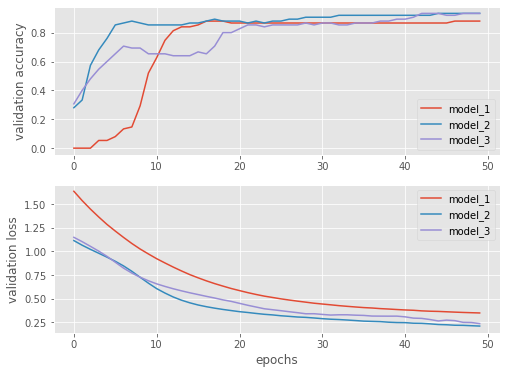

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_accurady = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();


##Obtention de la courbe ROC 
La courbe ROC est un moyen d'évaluer la qualité d'un classifieur. Elle indique le taux de faux positifs et de faux négatifs selon le seuil que l'on fixe pour séparer le fait que les données appartiennent ou non à une classe. Ici, on prend la sortie du classifieur softmax, on fixe un seuil d'acceptation pour une classe donnée, on observe le classement issue du classifieur associé à ce seuil pour chaque donnée de test. Si le seuil est très bas, les données vont toutes être dans la classe. Si on compare à la classe réelle, on vera qu'il y a des données mal classées, ce seront les faux positifs. Plus le seuil est faible plus le nombre de faux positifs s'approche des 100%. A l'inverse si le seuil est très haut, des données seront classées hors de la classe alors qu'elles en font partie. Ce sont des faux négatifs. Plus le seuil est haut plus le taux de faux négatifs s'approche de 100%. On obtient donc des points extrèmes en haut à droites et en bas à gauche d'une courbe ROC. Les points intermédiaires vont permettre de délimiter une *aire sous la courbe*. Un classifieur parfait possède une aire sous la courbe de 1. Un classifieur *aléatoire* possède une aire sous la courbe de 0.5. Le code suivant montre l'air sous la courbe de vos modèles. 


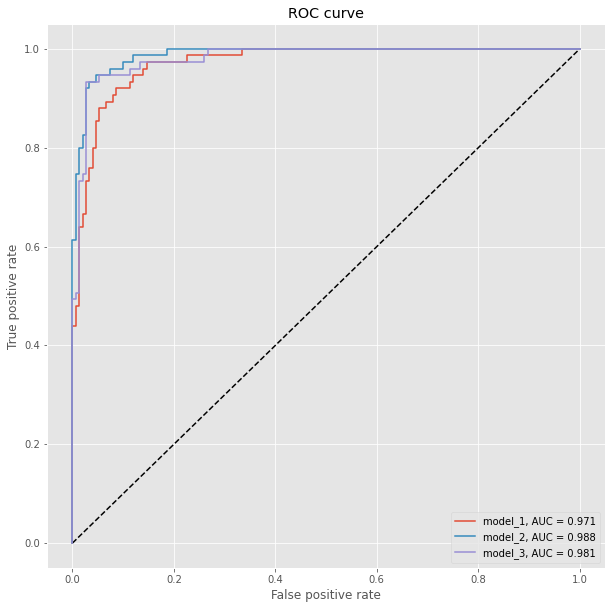

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();


##Question 8
En modifiant les modèles en termes de fonction de transfert des neurones, nombre de couches par modèle, nombre de neurones ou encore fonction de transfert des neurones, essayez de déterminer une configuration qui *bat* le modèle 2.
Montrez ses différentes courves de performances.

# Plus loin sur Tensor Flow

Nous allons présenter la programmation plus bas niveau de tensorFlow. En tensorFlow, il faut définir un modèle avant tout calcul. Ce modèle est traduit en un graphe qui peut être distribué (sur GPU, sur grappes de machines ...).

In [ ]:
import tensorflow as tf
x = tf.Variable(3, name="x")
y= tf.Variable(4, name="y")
f = x*x*y + y +2  

L'argument 'name' est facultatif mais utile pour les affichages et en particulier le 'tensorBoard' (abordé un peu plus loin dans ce TP). Pour exécuter le calcul, et par exemple obtenir la valeur de f, il faut créer une 'session'. Dans une session, on peut calculer les valeurs d'un noeud avec la méthode 'run()' de la session. Avant cela, il faut initialiser les valeurs des variables qui ont des valeurs initiales grâce à 'initializer'. 

In [ ]:
print(f)

tf.Tensor(42, shape=(), dtype=int32)
